# Cross-Entropy Loss with Softmax Visualization

This notebook visualizes the behavior of cross-entropy loss with softmax activation over the range (-10, 10)

Plotting cross-entropy loss with softmax over range (-10, 10)...
Saved: cross_entropy_softmax_visualization.png


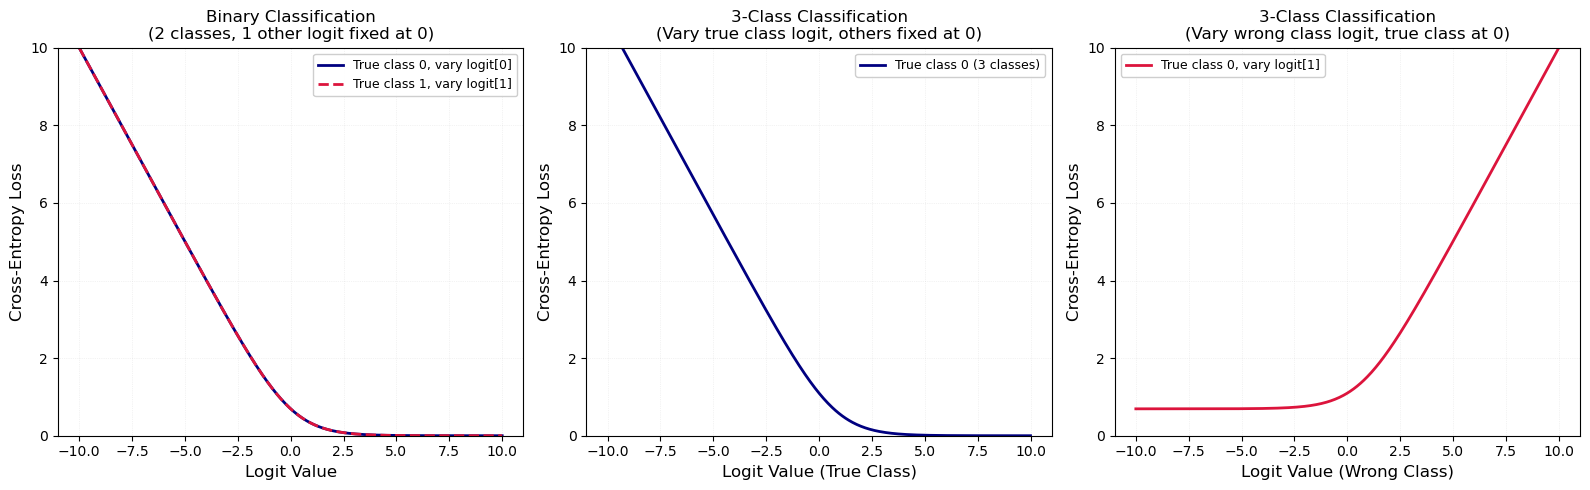


Key observations:
  - Left: Binary case shows symmetric behavior when varying true vs wrong class
  - Middle: Increasing true class logit → loss decreases (model more confident)
  - Right: Increasing wrong class logit → loss increases (model less confident)


In [1]:
import numpy as np
import matplotlib.pyplot as plt


def softmax(logits):
    """Compute softmax probabilities from logits."""
    exp_logits = np.exp(logits - np.max(logits, axis=-1, keepdims=True))  # Numerical stability
    return exp_logits / np.sum(exp_logits, axis=-1, keepdims=True)


def cross_entropy_loss(logits, true_label_idx):
    """
    Compute cross-entropy loss with softmax.
    
    Args:
        logits: Array of logits, shape (..., num_classes)
        true_label_idx: Index of the true class
    
    Returns:
        Cross-entropy loss
    """
    probs = softmax(logits)
    # Avoid log(0) by adding small epsilon
    return -np.log(probs[..., true_label_idx] + 1e-10)


def plot_cross_entropy_softmax(logit_range=(-10, 10), num_points=200, 
                               num_classes=3, figsize=(14, 5)):
    """
    Plot cross-entropy loss with softmax for different scenarios.
    
    Args:
        logit_range: Tuple of (min, max) for the logit values
        num_points: Number of points to plot
        num_classes: Number of classes for multi-class visualization
        figsize: Figure size
    """
    
    # Create logit values
    logits = np.linspace(logit_range[0], logit_range[1], num_points)
    
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    
    # ========================================================================
    # Plot 1: Binary Classification - Vary logit for true class
    # ========================================================================
    ax = axes[0]
    
    # Case 1: True class is class 0
    # Logits: [z, 0] where z varies
    logits_2d_c0 = np.stack([logits, np.zeros_like(logits)], axis=1)
    loss_c0 = cross_entropy_loss(logits_2d_c0, true_label_idx=0)
    
    # Case 2: True class is class 1
    # Logits: [0, z] where z varies
    logits_2d_c1 = np.stack([np.zeros_like(logits), logits], axis=1)
    loss_c1 = cross_entropy_loss(logits_2d_c1, true_label_idx=1)
    
    ax.plot(logits, loss_c0, label='True class 0, vary logit[0]', linewidth=2, color='navy')
    ax.plot(logits, loss_c1, label='True class 1, vary logit[1]', linewidth=2, 
            color='crimson', linestyle='--')
    
    ax.set_xlabel('Logit Value', fontsize=12)
    ax.set_ylabel('Cross-Entropy Loss', fontsize=12)
    ax.set_title('Binary Classification\n(2 classes, 1 other logit fixed at 0)', fontsize=12)
    ax.legend(fontsize=9, framealpha=0.95)
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.3)
    ax.set_ylim([0, 10])
    
    # ========================================================================
    # Plot 2: Multi-Class - Vary logit for true class
    # ========================================================================
    ax = axes[1]
    
    # True class is class 0
    # Logits: [z, 0, 0, ...] where z varies
    other_logits = np.zeros((num_points, num_classes - 1))
    logits_multi = np.concatenate([logits.reshape(-1, 1), other_logits], axis=1)
    loss_multi = cross_entropy_loss(logits_multi, true_label_idx=0)
    
    ax.plot(logits, loss_multi, linewidth=2, color='navy', label=f'True class 0 ({num_classes} classes)')
    
    ax.set_xlabel('Logit Value (True Class)', fontsize=12)
    ax.set_ylabel('Cross-Entropy Loss', fontsize=12)
    ax.set_title(f'{num_classes}-Class Classification\n(Vary true class logit, others fixed at 0)', fontsize=12)
    ax.legend(fontsize=9, framealpha=0.95)
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.3)
    ax.set_ylim([0, 10])
    
    # ========================================================================
    # Plot 3: Multi-Class - Vary logit for wrong class
    # ========================================================================
    ax = axes[2]
    
    # True class is class 0, vary logit for class 1
    # Logits: [0, z, 0, 0, ...] where z varies, true class is 0
    first_col = np.zeros((num_points, 1))
    second_col = logits.reshape(-1, 1)
    other_cols = np.zeros((num_points, max(0, num_classes - 2)))
    
    logits_vary_wrong = np.concatenate([first_col, second_col, other_cols], axis=1)
    loss_vary_wrong = cross_entropy_loss(logits_vary_wrong, true_label_idx=0)
    
    ax.plot(logits, loss_vary_wrong, linewidth=2, color='crimson', 
            label='True class 0, vary logit[1]')
    
    ax.set_xlabel('Logit Value (Wrong Class)', fontsize=12)
    ax.set_ylabel('Cross-Entropy Loss', fontsize=12)
    ax.set_title(f'{num_classes}-Class Classification\n(Vary wrong class logit, true class at 0)', fontsize=12)
    ax.legend(fontsize=9, framealpha=0.95)
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.3)
    ax.set_ylim([0, 10])
    
    plt.tight_layout()
    plt.savefig('cross_entropy_softmax_visualization.png', dpi=300, bbox_inches='tight')
    print("Saved: cross_entropy_softmax_visualization.png")
    plt.show()
    
    return fig, axes


# Create the visualization
print("Plotting cross-entropy loss with softmax over range (-10, 10)...")
print("="*60)

fig, axes = plot_cross_entropy_softmax(
    logit_range=(-10, 10),
    num_points=500,
    num_classes=3,
    figsize=(16, 5)
)

print("\nKey observations:")
print("  - Left: Binary case shows symmetric behavior when varying true vs wrong class")
print("  - Middle: Increasing true class logit → loss decreases (model more confident)")
print("  - Right: Increasing wrong class logit → loss increases (model less confident)")